In [ ]:
!pip install networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [502]:
import networkx as nx

# Creamos un complex multigraph no dirigido
P = nx.MultiGraph()

# lo importante es defininir los vehiculos
vehicles = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7']
# y los sensores que tienen los vehiculos
sensors_in_vehicles = [set(['s1', 's2']), set(['s2', 's3']), set(['s1', 's3', 's8']), set(['s4']), set(['s5', 's6', 's4']), set(['s5', 's6']), set(['s7'])]

# LLenamos nuestro grafo con los vehiculos P
for (vehicle, sensors_in_vehicles) in zip(vehicles, sensors_in_vehicles):
  # Al agregar un nodo podemos agregar un atributo, en nuestro caso S_(p)
  P.add_node(vehicle, S_p=sensors_in_vehicles)


In [ ]:
# Para acceder a los sensores de cada vehiculo podemos ver en P.nodes que el item
# p(minuscula) tiene 'S_p'
P.nodes['p5']['S_p']

{'s4', 's5', 's6'}

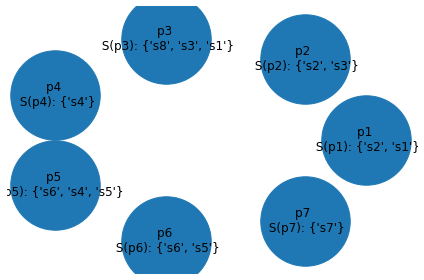

In [503]:
# Para graficar! podemos usar la funcion shell_layout que determina las posiciones de los p en un circulo
pos_vehicles = nx.circular_layout(P)

# para lo que grafiquemos dentro de los nodos, primero tenemos que crear diccionarios
# Con la sgte linea obtenemos los sensores para cada barco en nuestro grafo P
all_S_p = nx.get_node_attributes(P, 'S_p')
# ahora creamos los labels para cada nodo
labels=dict()
for vehicle in vehicles:
  labels[vehicle] = f"{vehicle} \n S({vehicle}): {all_S_p[vehicle]}"

import matplotlib.pyplot as plt
# graficamos el grafo P, con los nodos ubicados en pos_vehicles, con los labels
axis = plt.gca()
nx.draw(P, pos_vehicles, labels=labels,node_size=8000, ax=axis)
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])

plt.tight_layout()

In [524]:
# Para agregar vertices, recorremos todas particulas p (para diferencia una de otra, la sgte particula se llama q y no tiene nada que ver con el subset Q)

for node_p in P.nodes(data=True):
  for node_q in P.nodes(data=True):
    # determinamos la interseccion de sensores entre las particulas
    intersection = node_p[1]["S_p"] & node_q[1]["S_p"] 
    # si son diferentes p y ademas la interseccion no esta vacia
    if node_q != node_p and len(intersection) > 0:
      # chequeamos si no se agrego todavia el vertice
      if not P.has_edge(node_p[0], node_q[0]):
        # puede que haya mas de un sensor en comun!!
        # agregamos el vertice* como un diccionario 
        P.add_edge(node_p[0], node_q[0], S_pq=intersection)


In [ ]:
for node_p in P.nodes(data=True):
  for node_q in P.nodes(data=True):
    # determinamos la interseccion de sensores entre las particulas
    intersection = node_p[1]["S_p"] & node_q[1]["S_p"] 
    # si son diferentes p y ademas la interseccion no esta vacia
    if node_q != node_p and len(intersection) > 0:
      for shared_sensor in intersection:
        print(node_p[0], node_q[0], P.get_edge_data(node_p[0], node_q[0]))

p1 p2 {0: {'S_pq': {'s2'}}}
True
p1 p3 {0: {'S_pq': {'s1'}}}
True
p2 p1 {0: {'S_pq': {'s2'}}}
True
p2 p3 {0: {'S_pq': {'s3'}}}
True
p3 p1 {0: {'S_pq': {'s1'}}}
True
p3 p2 {0: {'S_pq': {'s3'}}}
True
p4 p5 {0: {'S_pq': {'s4'}}}
True
p5 p4 {0: {'S_pq': {'s4'}}}
True
p5 p6 {0: {'S_pq': {'s6', 's5'}}}
True
p5 p6 {0: {'S_pq': {'s6', 's5'}}}
True
p6 p5 {0: {'S_pq': {'s6', 's5'}}}
True
p6 p5 {0: {'S_pq': {'s6', 's5'}}}
True


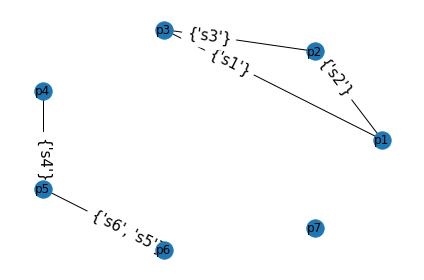

In [ ]:
# Graficamos
pos_vehicles = nx.circular_layout(P)

axis = plt.gca()
nx.draw(P, pos_vehicles, with_labels=True, ax=axis)
# agregamos la informacion de los edges
edge_labels=dict([((u,v,), d['S_pq'])
             for u,v,d in P.edges(data=True)])
nx.draw_networkx_edge_labels(P, pos_vehicles, edge_labels=edge_labels, label_pos=0.3, font_size=15)
plt.tight_layout()

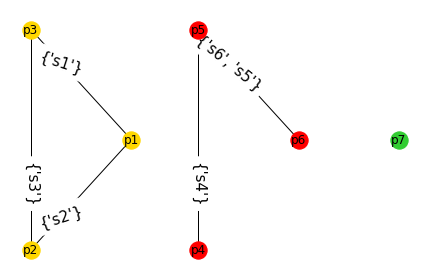

In [528]:
# Network x tiene una funcion que retorna grupos de nodos interconectados, es decir:
# Subfleets
sub_fleets = nx.connected_components(P)
# Graficamos, para eso necesitamos diferentes colores para diferentes sf
colors = ["gold",
    "red",
    "limegreen",
    "darkorange",
]
# recorremos las subflotas
for i, sub_fleet in enumerate(sub_fleets):
  # SOLO PARA GRAFICAR creamos nuevos grafos! SOLO PARA GRAFICAR !!!!!!
  P_sf = P.subgraph(sub_fleet)
  # como estamos creado grafos en cada iteracion, desplazamos los centros de las subflotas con
  # center = []
  pos_vehicles = nx.circular_layout(P_sf, center = [i*2.5, 0])
  axis = plt.gca()
  # graficamos y luego ademas agregamos el color de los nodos con node_color
  nx.draw(P_sf, pos_vehicles, with_labels=True, ax=axis, node_color=colors[i])
  # graficamos los edges
  edge_labels=dict([((u,v,), d['S_pq'])
               for u,v,d in P_sf.edges(data=True)])
  nx.draw_networkx_edge_labels(P_sf, pos_vehicles, edge_labels=edge_labels, label_pos=0.3, font_size=15)
  plt.tight_layout()

In [531]:
# Ahora cuando querramos obtener datos de las flotas, solo tenemos que recorrer sub_fleet
sub_fleets = list(nx.connected_components(P))
for i, sub_fleet in enumerate(sub_fleets):
  # Para hallar S_sf
  S_sf = set()
  for particle in sub_fleet:
    S_sf = S_sf | P.nodes[particle]['S_p']
  print(f'Subfleet {i} contains {S_sf} y se usa en eqs. 13c y 13d' )

  for particle in sub_fleet:
    print(f'Particle {particle} contains {P.nodes[particle]["S_p"]} y se usa en eqs. 13a y 13b')

Subfleet 0 contains {'s2', 's3', 's1', 's8'}
Subfleet 1 contains {'s6', 's4', 's5'}
Subfleet 2 contains {'s7'}


In [540]:
# como los nodos tienen sets de sensores, tambien pueden tener sets de U y sets de Q
# Ahora cuando querramos obtener datos de las flotas, solo tenemos que recorrer sub_fleet
import random as rd

for p, particle in enumerate(P.nodes()):
  P.nodes[particle]['U_p'] = (rd.random(), rd.random())

In [544]:
sub_fleets = list(nx.connected_components(P))
for i, sub_fleet in enumerate(sub_fleets):
  U_sf = []
  for p, particle in enumerate(sub_fleet):
    U_sf.append(P.nodes[particle]['U_p'])
    print(f"{particle} U_p {P.nodes[particle]['U_p']} eq. 13.a.")
  print(f'Subfleet {i} contains {U_sf} y se usa en la eq. 13b' )


p1 U_p (0.2353181997928483, 0.1943850272048936) eq. 13.a.
p3 U_p (0.16022459634937358, 0.49453031632679867) eq. 13.a.
p2 U_p (0.5135658077637989, 0.2950555406132258) eq. 13.a.
Subfleet 0 contains [(0.2353181997928483, 0.1943850272048936), (0.16022459634937358, 0.49453031632679867), (0.5135658077637989, 0.2950555406132258)] y se usa en la eq. 13b
p6 U_p (0.10208899324595855, 0.363358623764371) eq. 13.a.
p5 U_p (0.9119404350468945, 0.28199951093859343) eq. 13.a.
p4 U_p (0.5954682321671256, 0.913981167172108) eq. 13.a.
Subfleet 1 contains [(0.10208899324595855, 0.363358623764371), (0.9119404350468945, 0.28199951093859343), (0.5954682321671256, 0.913981167172108)] y se usa en la eq. 13b
p7 U_p (0.5085555868995967, 0.25174254082559744) eq. 13.a.
Subfleet 2 contains [(0.5085555868995967, 0.25174254082559744)] y se usa en la eq. 13b
